In [76]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
sns.set_theme()

data = pd.read_csv('data/Feeding-2022-10-04.csv', parse_dates = True)
data = data[["start", "type", "method", "amount"]]

print(data)

                   start         type  method  amount
0    2022-10-04 11:47:00      formula  bottle   120.0
1    2022-10-04 07:22:00      formula  bottle   120.0
2    2022-10-04 05:43:00      formula  bottle    30.0
3    2022-10-03 22:50:00      formula  bottle   150.0
4    2022-10-03 18:50:00      formula  bottle    60.0
..                   ...          ...     ...     ...
812  2022-06-08 22:32:00      formula  bottle    30.0
813  2022-06-08 20:21:00      formula  bottle    30.0
814  2022-06-08 20:14:00  breast milk  bottle    30.0
815  2022-06-08 18:28:00      formula  bottle    30.0
816  2022-06-08 18:05:00  breast milk  bottle    30.0

[817 rows x 4 columns]


In [82]:
def datetimeToDate(datetimeStr):
    return "-".join(datetimeStr.split(" ")[0].split("-")[1:3])
    
def datetimeToMin(datetimeStr): 
    t = datetimeStr.split(" ")[1].split(":")
    return int(t[0]) + int(t[1])/60
    return int(t[0]) * 60 + int(t[1])

In [83]:
data["start_date"] = data["start"].apply(datetimeToDate)
data["start_time_min"] = data["start"].apply(datetimeToMin)
print(data[0:100])

                  start         type  method  amount start_date  \
0   2022-10-04 11:47:00      formula  bottle   120.0      10-04   
1   2022-10-04 07:22:00      formula  bottle   120.0      10-04   
2   2022-10-04 05:43:00      formula  bottle    30.0      10-04   
3   2022-10-03 22:50:00      formula  bottle   150.0      10-03   
4   2022-10-03 18:50:00      formula  bottle    60.0      10-03   
..                  ...          ...     ...     ...        ...   
95  2022-09-17 23:32:00      formula  bottle   130.0      09-17   
96  2022-09-17 19:16:00      formula  bottle    30.0      09-17   
97  2022-09-17 16:23:00      formula  bottle    60.0      09-17   
98  2022-09-17 12:40:00      formula  bottle   150.0      09-17   
99  2022-09-17 08:35:00  breast milk  bottle   140.0      09-17   

    start_time_min  
0        11.783333  
1         7.366667  
2         5.716667  
3        22.833333  
4        18.833333  
..             ...  
95       23.533333  
96       19.266667  
97    

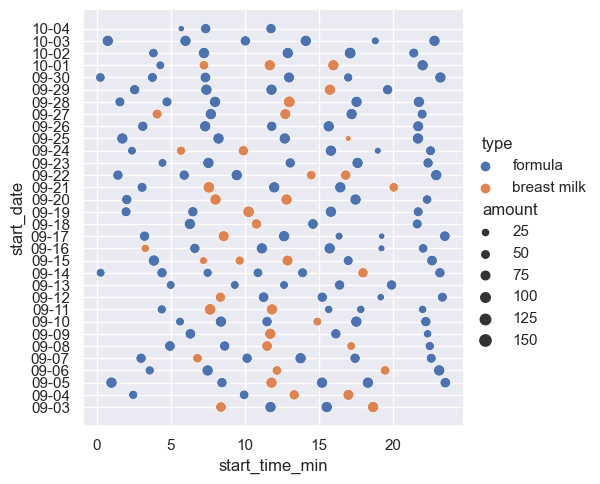

In [87]:
ax = sns.relplot(
    data=data[0:200],
#    kind="swarm",
    y="start_date", x="start_time_min",
    hue="type", size="amount", 
)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# plt.tight_layout()